<a href="https://colab.research.google.com/github/Zulfa-Varvani/ML-things/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from keras.datasets import cifar10
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping

In [ ]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
x_train=x_train/255.0
print(x_train.shape)
x_test=x_test/255.0
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


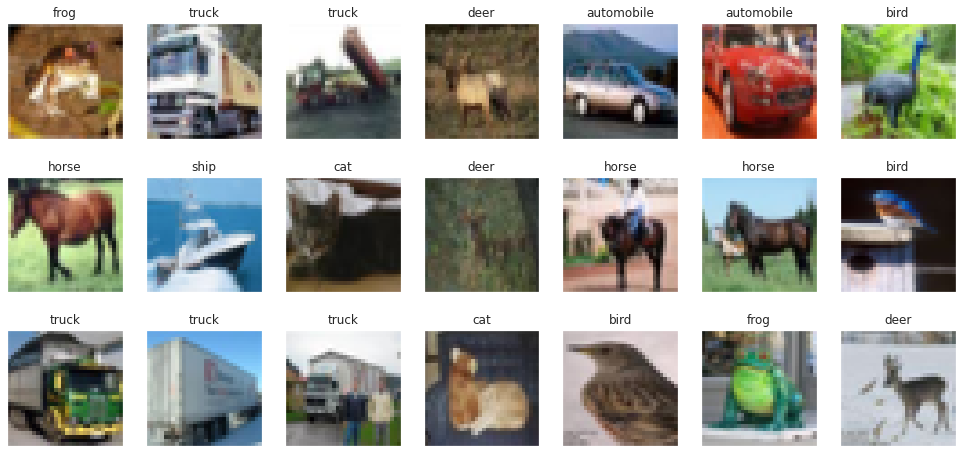

In [ ]:
#view 21 images and their labels in dataset
fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17,8))

index = 0
for i in range(3):
  for j in range(7):
    axes[i,j].set_title(labels[y_train[index][0]])
    axes[i,j].imshow(x_train[index])
    axes[i,j].get_xaxis().set_visible(False)
    axes[i,j].get_yaxis().set_visible(False)
    index+=1
plt.show()